In [1]:
from IPython.display import Latex

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from matplotlib.backends.backend_pdf import PdfPages
from scipy.optimize import curve_fit
def chi_square(x, y, func, p, delta_y=1):
    return sum((func(x, *p) - y)**2 / delta_y**2) / len(x)
def linfun(x, m, q):
    return m*x+q
pp = PdfPages('multipage.pdf')

La focale è 18.9 +- 0.4, compatibile entro 3 sigma con il valore atteso 20


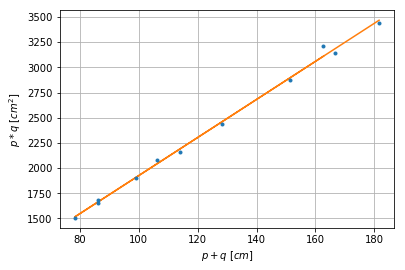

In [2]:
rawdata = pd.read_csv('data/focale.csv')
pqdata = pd.read_csv('data/focale2.csv')
longerr = 0.01/np.sqrt(12)
sumerr = np.sqrt(2)*longerr
proderr = np.sqrt( np.power(longerr/rawdata['x1'].values,2) + np.power(longerr/rawdata['x2'].values,2) ) * pqdata['prod'].values

popt1, pcov1 = curve_fit(linfun, pqdata['sum'], pqdata['prod'])
perr1 = np.sqrt(np.diag(pcov1))
#print(perr1)

plt.figure()
plt.grid()
plt.xlabel('$p+q$ $[cm]$')
plt.ylabel('$p*q$ $[cm^2]$')
plt.errorbar(pqdata.iloc[:,0], pqdata.iloc[:,1], xerr=sumerr, yerr=proderr, fmt='.')
plt.plot(pqdata['sum'], linfun(pqdata['sum'], popt1[0], popt1[1]))
pp.savefig()

print('La focale è %.1f +- %.1f, compatibile entro 3 sigma con il valore atteso 20' % (popt1[0], perr1[0]))

In [3]:
q = 20.61
y = 0.12
y1 = 0.64
y2 = 1.18
vernerr = 0.01/np.sqrt(12)

alpha = (np.arctan(y/q))
alphaerr = (np.sqrt( (vernerr/y)**2 + (vernerr/q)**2 ) * alpha) * 1/(1+(y/q)**2)
beta1 = (np.arctan(y1/q))
beta1err = (np.sqrt( (vernerr/y1)**2 + (vernerr/q)**2 ) * beta1) * 1/(1+(y1/q)**2)
beta2 = (np.arctan(y2/q))
beta2err = (np.sqrt( (vernerr/y2)**2 + (vernerr/q)**2 ) * beta2) * 1/(1+(y2/q)**2)

i1 = beta1 / alpha
i1err = np.sqrt( (beta1err/beta1)**2 + (alphaerr/alpha)**2 ) * i1
i2 = beta2 / alpha
i2err = np.sqrt( (beta2err/beta2)**2 + (alphaerr/alpha)**2 ) * i1

print('alpha = (%.4f +- %.4f) rad\nbeta1 = (%.4f +- %.4f) rad\nbeta2 = (%.4f +- %.4f) rad\ningrandimento 1 = (%.1f +- %.1f)\ningrandimento 2 = (%.1f +- %.1f)' % (alpha, alphaerr, beta1, beta1err, beta2, beta2err, i1, i1err, i2, i2err))

pp.close()

alpha = (0.0058 +- 0.0001) rad
beta1 = (0.0310 +- 0.0001) rad
beta2 = (0.0572 +- 0.0001) rad
ingrandimento 1 = (5.3 +- 0.1)
ingrandimento 2 = (9.8 +- 0.1)
